In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train_data_20221117.csv', index_col = 0)

In [3]:
df

,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble,Survived
445,1,0,2,1,0,4,7,0,0,1,1,0,0,0,0,1
650,3,0,0,0,3,1,0,0,0,1,0,1,0,0,0,0
172,3,1,1,1,0,2,0,0,0,1,0,0,0,1,0,1
450,2,1,2,1,4,3,0,0,0,1,0,1,0,0,0,0
314,2,1,1,1,4,3,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,0,0,1,2,0,0,0,0,1,0,0,0,1,0,1
270,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0
860,3,2,0,1,4,2,0,0,0,1,0,1,0,0,0,0
435,1,1,2,1,1,5,6,0,0,1,0,0,0,1,0,1


In [5]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,1:], df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [6]:
%%time
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred = gnb.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 1.0, recall: 1.0, f1score: 1.0
CPU times: user 9.31 ms, sys: 7.96 ms, total: 17.3 ms
Wall time: 17.3 ms


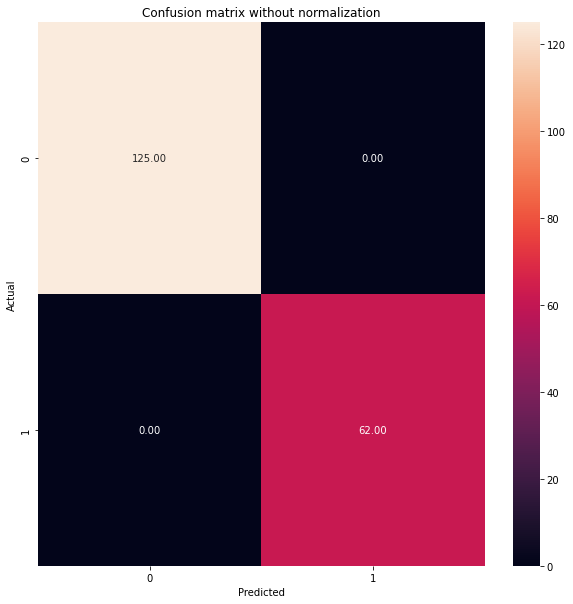

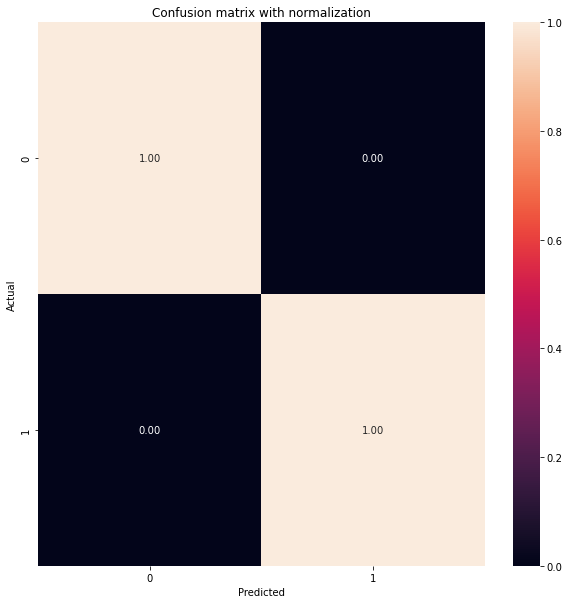

In [7]:
#plot results

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [9]:
print('training data')
print(classification_report(y_train, gnb.predict(X_train)))

print('test data')
print(classification_report(y_test, gnb.predict(X_test)))

training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       169

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436

test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        62

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187

